## Exploratory Data Analysis on Marketing Analytics

## Defining Columns

1. Education: Customer's education level
2. Marital_Status: Customer's marital status
3. Income: Customer's yearly household income
4. Kidhome: Number of children in customer's household
5. Teenhome: Number of teenagers in customer's household
6. Customer_Days: Date of customer's enrollment with the company
7. Recency: Number of days since customer's last purchase
8. MntWines: Amount spent on wine in the last 2 years
(Mnt = amount spent on the product in the last 2 years)
9. MntRegularProds: Amount spent on all products except gold.
10. NumDealsPurchases: Number of purchases made with a discount
Each Num column represents the number of purchases.
11. AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
12. AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise 
All Accepted columns represent the accepted offer wrt to the campaign no.
13. Response: 1 if customer accepted the offer in the last campaign, 0 otherwise
14. Complain: 1 if customer complained in the last 2 years, 0 otherwise

In [1]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importing the file
data=pd.read_csv("../input/marketing-data/ifood_df.csv")

#Basic inspection
#Viewing top 5 rows of the imported dataframe

data.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,1,407,392,0


In [3]:
#Finding the number of rows and columns in this dataset

data.shape

(2205, 39)

In [4]:
#Columns of this dataset are

data.columns

Index(['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Customer_Days', 'marital_Divorced', 'marital_Married',
       'marital_Single', 'marital_Together', 'marital_Widow',
       'education_2n Cycle', 'education_Basic', 'education_Graduation',
       'education_Master', 'education_PhD', 'MntTotal', 'MntRegularProds',
       'AcceptedCmpOverall'],
      dtype='object')

In [5]:
# Finding the null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                2205 non-null   float64
 1   Kidhome               2205 non-null   int64  
 2   Teenhome              2205 non-null   int64  
 3   Recency               2205 non-null   int64  
 4   MntWines              2205 non-null   int64  
 5   MntFruits             2205 non-null   int64  
 6   MntMeatProducts       2205 non-null   int64  
 7   MntFishProducts       2205 non-null   int64  
 8   MntSweetProducts      2205 non-null   int64  
 9   MntGoldProds          2205 non-null   int64  
 10  NumDealsPurchases     2205 non-null   int64  
 11  NumWebPurchases       2205 non-null   int64  
 12  NumCatalogPurchases   2205 non-null   int64  
 13  NumStorePurchases     2205 non-null   int64  
 14  NumWebVisitsMonth     2205 non-null   int64  
 15  AcceptedCmp3         

### No null values found in the dataset.Therefore, the dataset has no missing values.

In [6]:
data.columns

Index(['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Customer_Days', 'marital_Divorced', 'marital_Married',
       'marital_Single', 'marital_Together', 'marital_Widow',
       'education_2n Cycle', 'education_Basic', 'education_Graduation',
       'education_Master', 'education_PhD', 'MntTotal', 'MntRegularProds',
       'AcceptedCmpOverall'],
      dtype='object')

In [7]:
# Adding a new column named marital_status that will give the information if the person is married/together or not.
# Merging too many columns to a single column
marital=[]

for ind in data.index:
    if data['marital_Married'][ind]==1 or data['marital_Together'][ind]==1:
        marital.append(1)
    else:
        marital.append(0)
        
data['Marital']=marital

In [8]:
# Adding a new column named education
# Merging too many columns to a single column
education=[]

for ind in data.index:
    if data['education_2n Cycle'][ind]==1:
        education.append('2n Cycle')
    elif data['education_Basic'][ind]==1:
        education.append('Basic')
    elif data['education_Graduation'][ind]==1:
        education.append('Graduation')
    elif data['education_Master'][ind]==1:
        education.append('Master')
    elif data['education_PhD'][ind]==1:
        education.append('PhD')
    
        
data['Education']=education

In [9]:
# Converting no. of days to years
def handle_customerDays(value):
    return int(value/365)

data['Customer_Days']=data['Customer_Days'].apply(handle_customerDays)

# Renaming the column
data.rename(columns={'Customer_Days':'Customer_Asso_Years'},inplace=True)
data.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,Marital,Education
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,1,0,0,1529,1441,0,0,Graduation
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,1,0,0,21,15,0,0,Graduation
2,71613.0,0,0,26,426,49,127,111,21,42,...,0,0,1,0,0,734,692,0,1,Graduation
3,26646.0,1,0,26,11,4,20,10,3,5,...,0,0,1,0,0,48,43,0,1,Graduation
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,1,407,392,0,1,PhD


In [10]:
# Adding the no of kids and teens
data['No_of_Children']=data['Kidhome']+data['Teenhome']
data.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,Marital,Education,No_of_Children
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,1,0,0,1529,1441,0,0,Graduation,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,1,0,0,21,15,0,0,Graduation,2
2,71613.0,0,0,26,426,49,127,111,21,42,...,0,1,0,0,734,692,0,1,Graduation,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,0,1,0,0,48,43,0,1,Graduation,1
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,1,407,392,0,1,PhD,1


In [11]:
data.columns

Index(['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Customer_Asso_Years', 'marital_Divorced', 'marital_Married',
       'marital_Single', 'marital_Together', 'marital_Widow',
       'education_2n Cycle', 'education_Basic', 'education_Graduation',
       'education_Master', 'education_PhD', 'MntTotal', 'MntRegularProds',
       'AcceptedCmpOverall', 'Marital', 'Education', 'No_of_Children'],
      dtype='object')

In [12]:
data[['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','Response','AcceptedCmpOverall']].head(10)

,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response,AcceptedCmpOverall
0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0
8,0,0,0,0,0,1,0
9,0,0,1,0,0,0,1


In [13]:
for ind in data.index:
    data['AcceptedCmpOverall'][ind]=data['AcceptedCmpOverall'][ind]+data['Response'][ind]

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [14]:
data[['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','Response','AcceptedCmpOverall']].head(10)

,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response,AcceptedCmpOverall
0,0,0,0,0,0,1,1
1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0
8,0,0,0,0,0,1,1
9,0,0,1,0,0,0,1


In [15]:
data[['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds','MntRegularProds','MntTotal']].head()

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,MntRegularProds,MntTotal
0,635,88,546,172,88,88,1441,1529
1,11,1,6,2,1,6,15,21
2,426,49,127,111,21,42,692,734
3,11,4,20,10,3,5,43,48
4,173,43,118,46,27,15,392,407


In [16]:
for ind in data.index:
    data['MntTotal'][ind]=data['MntTotal'][ind]+data['MntGoldProds'][ind]

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [17]:
for ind in data.index:
    data['MntRegularProds'][ind]=data['MntTotal'][ind]-data['MntGoldProds'][ind]

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [18]:
# Total_Purchases
purchases_cols=[col for col in data.columns if 'Purchases' in col]
data['Total_Purchases']=data[purchases_cols].sum(axis=1)

In [19]:
data[['NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases','Total_Purchases']].head()

,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,Total_Purchases
0,3,8,10,4,25
1,2,1,1,2,6
2,1,8,2,10,21
3,2,2,0,4,8
4,5,5,3,6,19


In [20]:
data[['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds','MntRegularProds','MntTotal']].head()

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,MntRegularProds,MntTotal
0,635,88,546,172,88,88,1529,1617
1,11,1,6,2,1,6,21,27
2,426,49,127,111,21,42,734,776
3,11,4,20,10,3,5,48,53
4,173,43,118,46,27,15,407,422


In [21]:
#Dropping the columns which are not useful for data analysis

data=data.drop(['Z_CostContact','Z_Revenue','marital_Divorced','marital_Married','marital_Single','marital_Together','marital_Widow','education_2n Cycle','education_Basic','education_Graduation','education_Master','education_PhD','Kidhome','Teenhome'],axis=1)
data.head()

,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,...,Response,Age,Customer_Asso_Years,MntTotal,MntRegularProds,AcceptedCmpOverall,Marital,Education,No_of_Children,Total_Purchases
0,58138.0,58,635,88,546,172,88,88,3,8,...,1,63,7,1617,1529,1,0,Graduation,0,25
1,46344.0,38,11,1,6,2,1,6,2,1,...,0,66,6,27,21,0,0,Graduation,2,6
2,71613.0,26,426,49,127,111,21,42,1,8,...,0,55,6,776,734,0,1,Graduation,0,21
3,26646.0,26,11,4,20,10,3,5,2,2,...,0,36,6,53,48,0,1,Graduation,1,8
4,58293.0,94,173,43,118,46,27,15,5,5,...,0,39,6,422,407,0,1,PhD,1,19


In [22]:
data.columns

Index(['Income', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Response', 'Age', 'Customer_Asso_Years', 'MntTotal',
       'MntRegularProds', 'AcceptedCmpOverall', 'Marital', 'Education',
       'No_of_Children', 'Total_Purchases'],
      dtype='object')

In [23]:
data.shape

(2205, 29)

In [24]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Income,2205.0,51622.094785,20713.063826,1730.0,35196.0,51287.0,68281.0,113734.0
Recency,2205.0,49.009070,28.932111,0.0,24.0,49.0,74.0,99.0
MntWines,2205.0,306.164626,337.493839,0.0,24.0,178.0,507.0,1493.0
MntFruits,2205.0,26.403175,39.784484,0.0,2.0,8.0,33.0,199.0
MntMeatProducts,2205.0,165.312018,217.784507,0.0,16.0,68.0,232.0,1725.0
MntFishProducts,2205.0,37.756463,54.824635,0.0,3.0,12.0,50.0,259.0
MntSweetProducts,2205.0,27.128345,41.130468,0.0,1.0,8.0,34.0,262.0
MntGoldProds,2205.0,44.057143,51.736211,0.0,9.0,25.0,56.0,321.0
NumDealsPurchases,2205.0,2.318367,1.886107,0.0,1.0,2.0,3.0,15.0
NumWebPurchases,2205.0,4.100680,2.737424,0.0,2.0,4.0,6.0,27.0


## Important insights:
1. Income of an average customer is $51622.
2. Age of an average customer is 51.

## Data Visualization

In [25]:
data.columns

Index(['Income', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Response', 'Age', 'Customer_Asso_Years', 'MntTotal',
       'MntRegularProds', 'AcceptedCmpOverall', 'Marital', 'Education',
       'No_of_Children', 'Total_Purchases'],
      dtype='object')

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='No_of_Children', ylabel='count'>

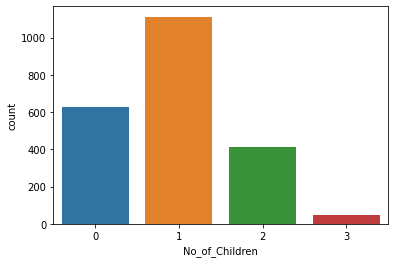

In [26]:
sns.countplot(data['No_of_Children'])

## Majority of the customers have 1 children or no children.

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Customer_Asso_Years', ylabel='count'>

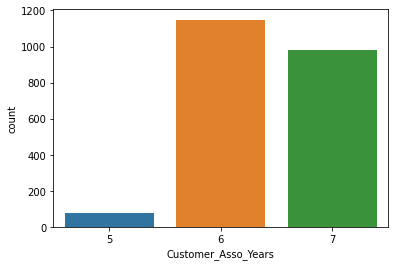

In [27]:
sns.countplot(data['Customer_Asso_Years'])

## The majority of the customers are associated with the company for 6-7 years.

<AxesSubplot:ylabel='AcceptedCmpOverall'>

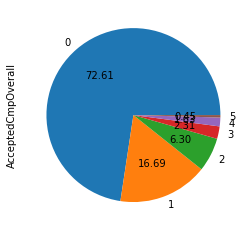

In [28]:
data['AcceptedCmpOverall'].value_counts().plot(kind='pie',autopct='%.2f')

### 72.61% of customers have not accepted the offer in any of the campaigns.

<AxesSubplot:ylabel='Marital'>

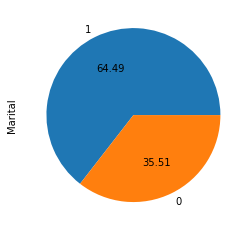

In [29]:
data['Marital'].value_counts().plot(kind='pie',autopct='%.2f')

### Majority of the customer are Married or Together.

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Education', ylabel='count'>

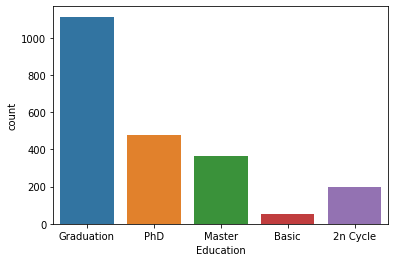

In [30]:
sns.countplot(data['Education'])

<AxesSubplot:ylabel='Complain'>

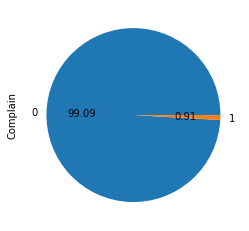

In [31]:
data['Complain'].value_counts().plot(kind='pie',autopct='%.2f')

### 99% of the customers have never complained in the last two years suggesting that they are satisfied with the products and services of the company.

(array([ 37., 185., 333., 398., 351., 366., 331., 173.,  28.,   3.]),
 array([  1730. ,  12930.4,  24130.8,  35331.2,  46531.6,  57732. ,
         68932.4,  80132.8,  91333.2, 102533.6, 113734. ]),
 <BarContainer object of 10 artists>)

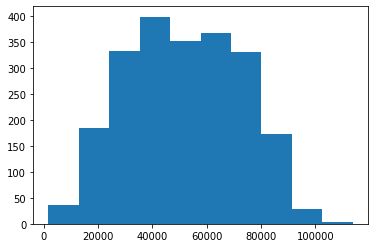

In [32]:
# Income distribution

plt.hist(data['Income'],bins=10)

## Most Income is distributed between $0-$100000 with a few outliers

(array([ 43., 176., 199., 418., 379., 304., 271., 239., 153.,  23.]),
 array([24. , 29.6, 35.2, 40.8, 46.4, 52. , 57.6, 63.2, 68.8, 74.4, 80. ]),
 <BarContainer object of 10 artists>)

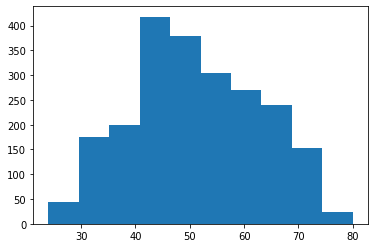

In [33]:
# Age distribution

plt.hist(data['Age'],bins=10)

### Most of the customer's age is between 30-75 years

## Identifying features containing outliers

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='MntWines'>

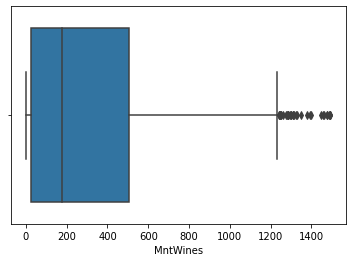

In [34]:
sns.boxplot(data['MntWines'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='MntFruits'>

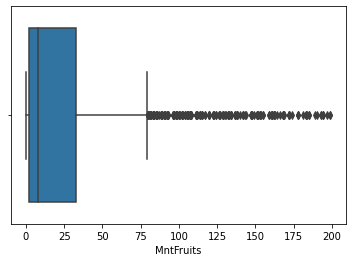

In [35]:
sns.boxplot(data['MntFruits'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='MntMeatProducts'>

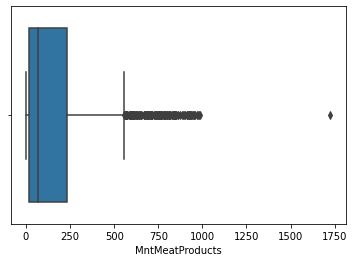

In [36]:
sns.boxplot(data['MntMeatProducts']) 

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='MntFishProducts'>

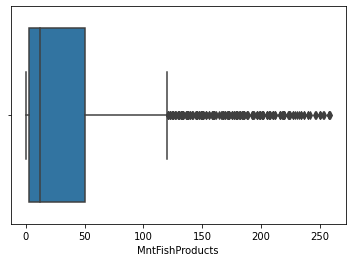

In [37]:
sns.boxplot(data['MntFishProducts'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='MntSweetProducts'>

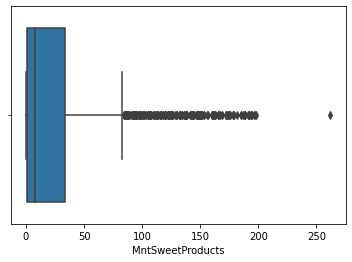

In [38]:
sns.boxplot(data['MntSweetProducts'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='MntGoldProds'>

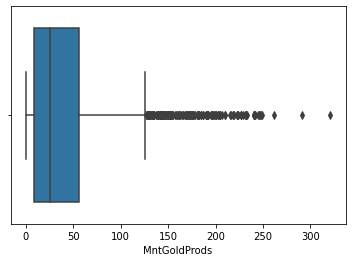

In [39]:
sns.boxplot(data['MntGoldProds'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='MntRegularProds'>

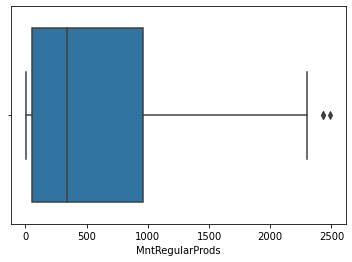

In [40]:
sns.boxplot(data['MntRegularProds'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='MntTotal'>

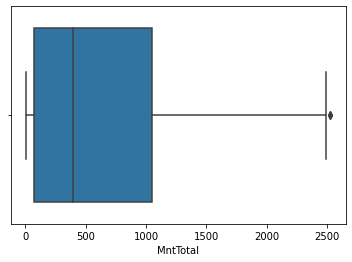

In [41]:
sns.boxplot(data['MntTotal'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='NumDealsPurchases'>

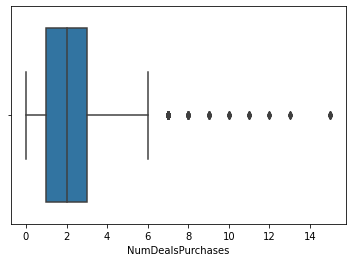

In [42]:
sns.boxplot(data['NumDealsPurchases'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='NumWebPurchases'>

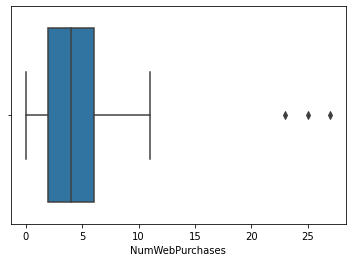

In [43]:
sns.boxplot(data['NumWebPurchases'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='NumCatalogPurchases'>

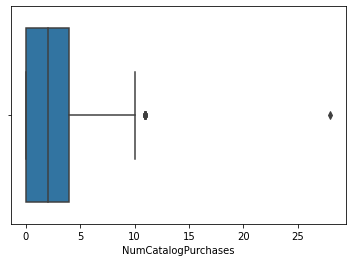

In [44]:
sns.boxplot(data['NumCatalogPurchases'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='NumWebVisitsMonth'>

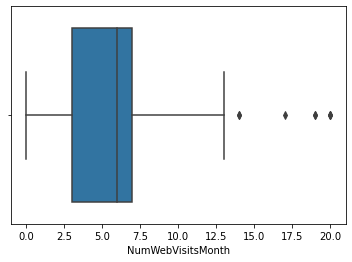

In [45]:
sns.boxplot(data['NumWebVisitsMonth'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Total_Purchases'>

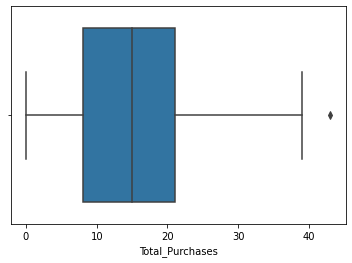

In [46]:
sns.boxplot(data['Total_Purchases'])

In [47]:
data.columns

Index(['Income', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Response', 'Age', 'Customer_Asso_Years', 'MntTotal',
       'MntRegularProds', 'AcceptedCmpOverall', 'Marital', 'Education',
       'No_of_Children', 'Total_Purchases'],
      dtype='object')

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Income', ylabel='MntTotal'>

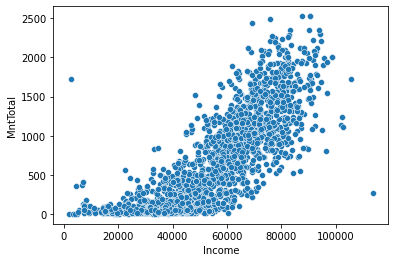

In [48]:
sns.scatterplot(data['Income'],data['MntTotal'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='No_of_Children', ylabel='MntTotal'>

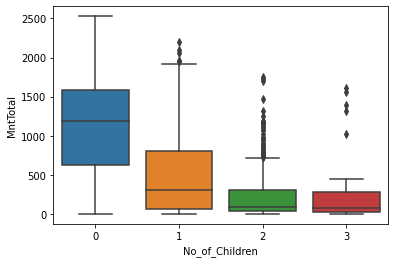

In [49]:
sns.boxplot(data['No_of_Children'],data['MntTotal'])

### Customers having children spend less as compared to customers having no children. As the number of children increases, the average spending of the customers decreases.

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='No_of_Children', ylabel='NumDealsPurchases'>

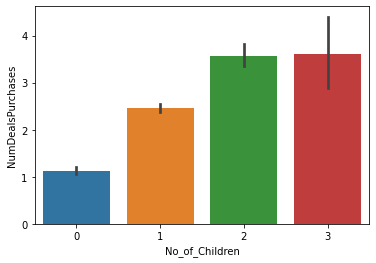

In [50]:
sns.barplot(data['No_of_Children'],data['NumDealsPurchases'])

### Customers having children are more attracted to deals and wait for the discounts.

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='No_of_Children', ylabel='NumWebPurchases'>

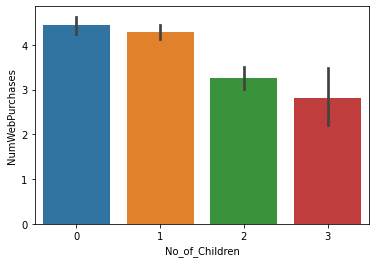

In [51]:
sns.barplot(data['No_of_Children'],data['NumWebPurchases'])

### Online Purchase is popular among all the customers.

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='No_of_Children', ylabel='NumWebVisitsMonth'>

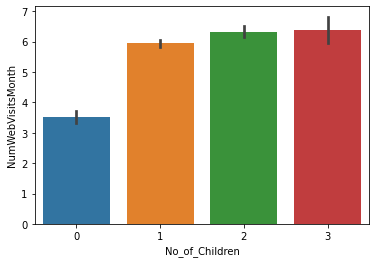

In [52]:
sns.barplot(data['No_of_Children'],data['NumWebVisitsMonth'])

### Number of web visits per month is high among the customers having 1 or more children.

In [53]:
# Which product is performing the best?
mnt_cols = [col for col in data.columns if 'Mnt' in col]

spending = pd.DataFrame(round(data[mnt_cols].mean(), 1), columns=['Average']).sort_values(by='Average').reset_index()
spending

,index,Average
0,MntFruits,26.4
1,MntSweetProducts,27.1
2,MntFishProducts,37.8
3,MntGoldProds,44.1
4,MntMeatProducts,165.3
5,MntWines,306.2
6,MntRegularProds,562.8
7,MntTotal,606.8


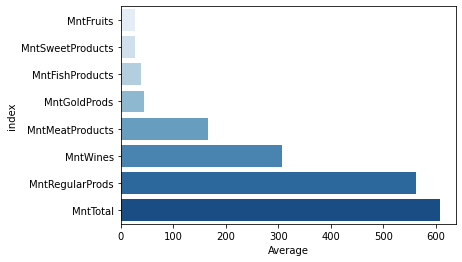

In [54]:
ax = sns.barplot(x='Average', y='index', data=spending, palette='Blues')

### An average customer spent:
1. 25-50 dollars on fruits,sweets,fish and gold.
2. Over 160 dollars on meat.
3. Over 300 dollars on wines.
4. Over 600 dollars total.

## Best performing product of the company is Wine followed by Meat.

In [55]:
# Let's analyse the channels and find out which channel is performing well.

channel_cols = [col for col in data.columns if 'Num' in col] + ['Total_Purchases', 'AcceptedCmpOverall']
channels = pd.DataFrame(round(data[channel_cols].mean(),1), columns = ['Average']).sort_values(by='Average').reset_index()
channels

,index,Average
0,AcceptedCmpOverall,0.5
1,NumDealsPurchases,2.3
2,NumCatalogPurchases,2.6
3,NumWebPurchases,4.1
4,NumWebVisitsMonth,5.3
5,NumStorePurchases,5.8
6,Total_Purchases,14.9


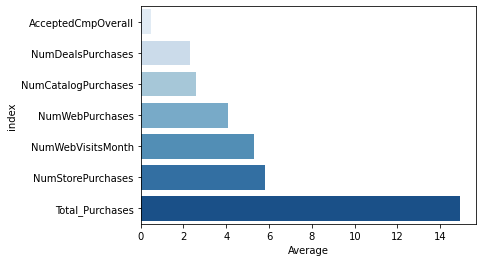

In [56]:
ax = sns.barplot(x='Average', y='index', data=channels, palette='Blues')

### An average customer-
1. Accepted less than 1 advertising campaign.
2. Made 2 deals purchases, 2 catalog purchases, 4 Web purchases, and 5 store purchases.
3. 14 total purchases
4. Visited the website 5 times.

## Stores are performing well. Underperforming channels are Advertising campaigns followed by deals and catalogs.

In [57]:
# calculate success rate (percent accepted)
cam_success = pd.DataFrame(data[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']].mean()*100, 
                           columns=['Percent']).reset_index()

In [58]:
cam_success

,index,Percent
0,AcceptedCmp1,6.439909
1,AcceptedCmp2,1.360544
2,AcceptedCmp3,7.392290
3,AcceptedCmp4,7.437642
4,AcceptedCmp5,7.301587
5,Response,15.102041


Text(0.5, 1.0, 'Marketing campaign success rate')

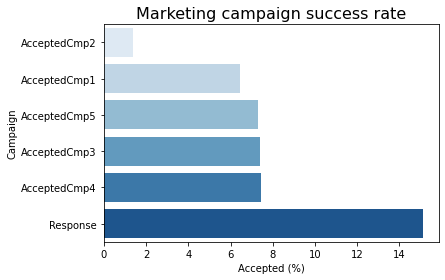

In [59]:
# plot
sns.barplot(x='Percent', y='index', data=cam_success.sort_values('Percent'), palette='Blues')
plt.xlabel('Accepted (%)')
plt.ylabel('Campaign')
plt.title('Marketing campaign success rate', size=16)

## The last campaign is the most successful campaign and the second campaign is the least successful campaign.

## Conclusions:

* Majority of the customers are associated with the company for more than 5 years.
* 99% of the customers have never complained in the last two years.
* 82.61% of the customers have never accepted offers in any of the campaigns.
* Customers having children spend less as compared to customers having no children indicating that customers having 
  children save more.
* Customers having children wait more for the discounts to buy products.
* Best performing product of the company is Wine followed by Meat.
* Best performing channels: Stores
* Worst performing channels: Advertising campaigns indicating that campaigns are not working.
* The last campaign is the most successful campaign and the second campaign is the least successful campaign.